In [1]:
import bempp.api
from bempp.api.assembly.blocked_operator import BlockedOperator
import math
import numpy as np
import scipy 
import cmath
from numba import objmode
from numpy.linalg import slogdet
from bempp.api.operators.far_field import helmholtz as helmholtz_farfield
import matplotlib.pyplot as plt

In [2]:
N_wn = 20
lbound_wn = 0
ubound_wn = 10
quad_points = np.linspace(np.exp(-ubound_wn), np.exp(-lbound_wn), N_wn)

In [3]:
# After rotation 
ellipsoid = bempp.api.shapes.ellipsoid(r1 = 0.3, r2 = 0.3, r3 = 0.6, origin = (0, 0, 0), h = 0.03)
ele_ellipsoid = ellipsoid.elements
ver_ellipsoid = ellipsoid.vertices


#Ellipsoid 1 
angle_x_1 = np.pi/3
R_x_1 = [[1, 0, 0], [0, np.cos(angle_x_1),  -np.sin(angle_x_1)], [0,  np.sin(angle_x_1),  np.cos(angle_x_1)]]

angle_z_1 = np.pi/4
R_z_1 = [[np.cos(angle_z_1), -np.sin(angle_z_1), 0], [np.sin(angle_z_1), np.cos(angle_z_1), 0], [0, 0, 1]]

ver_ellipsoid1 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid1[:,i] = R_z_1 @ (R_x_1 @ ver_ellipsoid[:,i])
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid1[1, i] -= 1
ellipsoid_1_6_rotated = bempp.api.Grid(ver_ellipsoid1, ele_ellipsoid)
#================================================================================================================
#Ellipsoid 2 
angle_x_2 = -np.pi/3
R_x_2 = [[1, 0, 0], [0, np.cos(angle_x_2),  -np.sin(angle_x_2)], [0,  np.sin(angle_x_2),  np.cos(angle_x_2)]]

angle_z_2 = -np.pi/4
R_z_2 = [[np.cos(angle_z_2), -np.sin(angle_z_2), 0], [np.sin(angle_z_2), np.cos(angle_z_2), 0], [0, 0, 1]]

ver_ellipsoid2 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid2[:,i] = R_z_2 @ (R_x_2 @ ver_ellipsoid[:,i])
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid2[1, i] += 1
ellipsoid_2_6_rotated = bempp.api.Grid(ver_ellipsoid2, ele_ellipsoid)
#================================================================================================================
#Ellipsoid 3 
angle_x_3 = -np.pi/3
R_x_3 = [[1, 0, 0], [0, np.cos(angle_x_3),  -np.sin(angle_x_3)], [0,  np.sin(angle_x_3),  np.cos(angle_x_3)]]

angle_z_3 = np.pi/4
R_z_3 = [[np.cos(angle_z_3), -np.sin(angle_z_3), 0], [np.sin(angle_z_3), np.cos(angle_z_3), 0], [0, 0, 1]]

ver_ellipsoid3 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid3[:,i] = R_z_3 @ (R_x_3 @ ver_ellipsoid[:,i])
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid3[0, i] -= 2
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid3[1, i] += 1
ellipsoid_3_6_rotated = bempp.api.Grid(ver_ellipsoid3, ele_ellipsoid)
#================================================================================================================
#Ellipsoid 4 
angle_x_4 = np.pi/3
R_x_4 = [[1, 0, 0], [0, np.cos(angle_x_4),  -np.sin(angle_x_4)], [0,  np.sin(angle_x_4),  np.cos(angle_x_4)]]

angle_z_4 = -np.pi/4
R_z_4 = [[np.cos(angle_z_4), -np.sin(angle_z_4), 0], [np.sin(angle_z_4), np.cos(angle_z_4), 0], [0, 0, 1]]

ver_ellipsoid4 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid4[:,i] = R_z_4 @ (R_x_4 @ ver_ellipsoid[:,i])
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid4[0, i] -= 2
    ver_ellipsoid4[1, i] -= 1
ellipsoid_4_6_rotated = bempp.api.Grid(ver_ellipsoid4, ele_ellipsoid)

#================================================================================================================
#Ellipsoid 5
angle_x_5 = np.pi/3
R_x_5 = [[1, 0, 0], [0, np.cos(angle_x_5),  -np.sin(angle_x_5)], [0,  np.sin(angle_x_5),  np.cos(angle_x_5)]]

ver_ellipsoid5 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid5[:,i] = R_x_5 @ ver_ellipsoid[:,i]
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid5[0, i] -= 1
    ver_ellipsoid5[2, i] += np.sqrt(2)
ellipsoid_5_6_rotated = bempp.api.Grid(ver_ellipsoid5, ele_ellipsoid)

#================================================================================================================
#Ellipsoid 6
angle_x_6 = -np.pi/3
R_x_6 = [[1, 0, 0], [0, np.cos(angle_x_6),  -np.sin(angle_x_6)], [0,  np.sin(angle_x_6),  np.cos(angle_x_6)]]

ver_ellipsoid6 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid6[:,i] = R_x_6 @ ver_ellipsoid[:,i]
for i in range(ver_ellipsoid.shape[1]):
    ver_ellipsoid6[0, i] -= 1
    ver_ellipsoid6[2, i] -= np.sqrt(2)
ellipsoid_6_6_rotated = bempp.api.Grid(ver_ellipsoid6, ele_ellipsoid)


mesh_ellipsoid1_6_rotated_outwards = bempp.api.export('ellipsoid1_6_rotated_outwards.msh', grid = ellipsoid_1_6_rotated)
mesh_ellipsoid2_6_rotated_outwards = bempp.api.export('ellipsoid2_6_rotated_outwards.msh', grid = ellipsoid_2_6_rotated)
mesh_ellipsoid3_6_rotated_outwards = bempp.api.export('ellipsoid3_6_rotated_outwards.msh', grid = ellipsoid_3_6_rotated)
mesh_ellipsoid4_6_rotated_outwards = bempp.api.export('ellipsoid4_6_rotated_outwards.msh', grid = ellipsoid_4_6_rotated)
mesh_ellipsoid5_6_rotated_outwards = bempp.api.export('ellipsoid5_6_rotated_outwards.msh', grid = ellipsoid_5_6_rotated)
mesh_ellipsoid6_6_rotated_outwards = bempp.api.export('ellipsoid6_6_rotated_outwards.msh', grid = ellipsoid_6_6_rotated)

# Rotation

In [4]:
ellipsoid = bempp.api.shapes.ellipsoid(r1 = 0.3, r2 = 0.3, r3 = 0.6, origin = (0, 0, 0), h = 0.03)
ele_ellipsoid = ellipsoid.elements
ver_ellipsoid = ellipsoid.vertices

In [ ]:
Cas_ = []
for rotation_angle in np.linspace(0, np.pi*2, 40):
    
    #Ellipsoid 1 
    angle_x_1 = rotation_angle
    R_x_1 = [[1, 0, 0], [0, np.cos(angle_x_1),  -np.sin(angle_x_1)], [0,  np.sin(angle_x_1),  np.cos(angle_x_1)]]

    angle_z_1 = np.pi/4
    R_z_1 = [[np.cos(angle_z_1), -np.sin(angle_z_1), 0], [np.sin(angle_z_1), np.cos(angle_z_1), 0], [0, 0, 1]]

    ver_ellipsoid1 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid1[:,i] = R_z_1 @ (R_x_1 @ ver_ellipsoid[:,i])
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid1[1, i] -= 1
    ellipsoid_1_6_rotated = bempp.api.Grid(ver_ellipsoid1, ele_ellipsoid)
    #================================================================================================================
    #Ellipsoid 2 
    angle_x_2 = -rotation_angle
    R_x_2 = [[1, 0, 0], [0, np.cos(angle_x_2),  -np.sin(angle_x_2)], [0,  np.sin(angle_x_2),  np.cos(angle_x_2)]]

    angle_z_2 = -np.pi/4
    R_z_2 = [[np.cos(angle_z_2), -np.sin(angle_z_2), 0], [np.sin(angle_z_2), np.cos(angle_z_2), 0], [0, 0, 1]]

    ver_ellipsoid2 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid2[:,i] = R_z_2 @ (R_x_2 @ ver_ellipsoid[:,i])
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid2[1, i] += 1
    ellipsoid_2_6_rotated = bempp.api.Grid(ver_ellipsoid2, ele_ellipsoid)
    #================================================================================================================
    #Ellipsoid 3 
    angle_x_3 = -rotation_angle
    R_x_3 = [[1, 0, 0], [0, np.cos(angle_x_3),  -np.sin(angle_x_3)], [0,  np.sin(angle_x_3),  np.cos(angle_x_3)]]

    angle_z_3 = np.pi/4
    R_z_3 = [[np.cos(angle_z_3), -np.sin(angle_z_3), 0], [np.sin(angle_z_3), np.cos(angle_z_3), 0], [0, 0, 1]]

    ver_ellipsoid3 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid3[:,i] = R_z_3 @ (R_x_3 @ ver_ellipsoid[:,i])
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid3[0, i] -= 2
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid3[1, i] += 1
    ellipsoid_3_6_rotated = bempp.api.Grid(ver_ellipsoid3, ele_ellipsoid)
    #================================================================================================================
    #Ellipsoid 4 
    angle_x_4 = rotation_angle
    R_x_4 = [[1, 0, 0], [0, np.cos(angle_x_4),  -np.sin(angle_x_4)], [0,  np.sin(angle_x_4),  np.cos(angle_x_4)]]

    angle_z_4 = -np.pi/4
    R_z_4 = [[np.cos(angle_z_4), -np.sin(angle_z_4), 0], [np.sin(angle_z_4), np.cos(angle_z_4), 0], [0, 0, 1]]

    ver_ellipsoid4 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid4[:,i] = R_z_4 @ (R_x_4 @ ver_ellipsoid[:,i])
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid4[0, i] -= 2
        ver_ellipsoid4[1, i] -= 1
    ellipsoid_4_6_rotated = bempp.api.Grid(ver_ellipsoid4, ele_ellipsoid)

    #================================================================================================================
    #Ellipsoid 5
    angle_x_5 = rotation_angle
    R_x_5 = [[1, 0, 0], [0, np.cos(angle_x_5),  -np.sin(angle_x_5)], [0,  np.sin(angle_x_5),  np.cos(angle_x_5)]]

    ver_ellipsoid5 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid5[:,i] = R_x_5 @ ver_ellipsoid[:,i]
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid5[0, i] -= 1
        ver_ellipsoid5[2, i] += np.sqrt(2)
    ellipsoid_5_6_rotated = bempp.api.Grid(ver_ellipsoid5, ele_ellipsoid)

    #================================================================================================================
    #Ellipsoid 6
    angle_x_6 = -rotation_angle
    R_x_6 = [[1, 0, 0], [0, np.cos(angle_x_6),  -np.sin(angle_x_6)], [0,  np.sin(angle_x_6),  np.cos(angle_x_6)]]

    ver_ellipsoid6 = np.zeros((ver_ellipsoid.shape[0], ver_ellipsoid.shape[1]))
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid6[:,i] = R_x_6 @ ver_ellipsoid[:,i]
    for i in range(ver_ellipsoid.shape[1]):
        ver_ellipsoid6[0, i] -= 1
        ver_ellipsoid6[2, i] -= np.sqrt(2)
    ellipsoid_6_6_rotated = bempp.api.Grid(ver_ellipsoid6, ele_ellipsoid)


    
    space_ellipsoid1 =  bempp.api.function_space(ellipsoid_1_6_rotated,'P',1)
    space_ellipsoid2 =  bempp.api.function_space(ellipsoid_2_6_rotated,'P',1)
    space_ellipsoid3 =  bempp.api.function_space(ellipsoid_3_6_rotated,'P',1)
    space_ellipsoid4 =  bempp.api.function_space(ellipsoid_4_6_rotated,'P',1)
    space_ellipsoid5 =  bempp.api.function_space(ellipsoid_5_6_rotated,'P',1)
    space_ellipsoid6 =  bempp.api.function_space(ellipsoid_6_6_rotated,'P',1)
    
    results = []
    for index2, point2 in enumerate(quad_points):

        wavenumber = -1j * np.log(point2)
        
        slp11 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid1, space_ellipsoid1, space_ellipsoid1, wavenumber)
        slp12 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid2, space_ellipsoid1, space_ellipsoid1, wavenumber)
        slp13 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid3, space_ellipsoid1, space_ellipsoid1, wavenumber)
        slp14 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid4, space_ellipsoid1, space_ellipsoid1, wavenumber)
        slp15 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid5, space_ellipsoid1, space_ellipsoid1, wavenumber)
        slp16 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid6, space_ellipsoid1, space_ellipsoid1, wavenumber)
        
        slp21 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid1, space_ellipsoid2 , space_ellipsoid2 , wavenumber)
        slp22 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid2, space_ellipsoid2 , space_ellipsoid2 , wavenumber)
        slp23 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid3, space_ellipsoid2 , space_ellipsoid2 , wavenumber)
        slp24 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid4, space_ellipsoid2 , space_ellipsoid2 , wavenumber)
        slp25 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid5, space_ellipsoid2 , space_ellipsoid2 , wavenumber)
        slp26 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid6, space_ellipsoid2 , space_ellipsoid2 , wavenumber)
        
        slp31 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid1, space_ellipsoid3 , space_ellipsoid3 , wavenumber)
        slp32 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid2, space_ellipsoid3 , space_ellipsoid3 , wavenumber)
        slp33 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid3, space_ellipsoid3 , space_ellipsoid3 , wavenumber)
        slp34 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid4, space_ellipsoid3 , space_ellipsoid3 , wavenumber)
        slp35 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid5, space_ellipsoid3 , space_ellipsoid3 , wavenumber)
        slp36 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid6, space_ellipsoid3 , space_ellipsoid3 , wavenumber)
        
        slp41 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid1, space_ellipsoid4 , space_ellipsoid4 , wavenumber)
        slp42 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid2, space_ellipsoid4 , space_ellipsoid4 , wavenumber)
        slp43 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid3, space_ellipsoid4 , space_ellipsoid4 , wavenumber)
        slp44 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid4, space_ellipsoid4 , space_ellipsoid4 , wavenumber)
        slp45 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid5, space_ellipsoid4 , space_ellipsoid4 , wavenumber)
        slp46 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid6, space_ellipsoid4 , space_ellipsoid4 , wavenumber)
        
        slp51 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid1, space_ellipsoid5 , space_ellipsoid5 , wavenumber)
        slp52 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid2, space_ellipsoid5 , space_ellipsoid5 , wavenumber)
        slp53 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid3, space_ellipsoid5 , space_ellipsoid5 , wavenumber)
        slp54 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid4, space_ellipsoid5 , space_ellipsoid5 , wavenumber)
        slp55 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid5, space_ellipsoid5 , space_ellipsoid5 , wavenumber)
        slp56 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid6, space_ellipsoid5 , space_ellipsoid5 , wavenumber)
        
        slp61 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid1, space_ellipsoid6 , space_ellipsoid6 , wavenumber)
        slp62 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid2, space_ellipsoid6 , space_ellipsoid6 , wavenumber)
        slp63 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid3, space_ellipsoid6 , space_ellipsoid6 , wavenumber)
        slp64 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid4, space_ellipsoid6 , space_ellipsoid6 , wavenumber)
        slp65 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid5, space_ellipsoid6 , space_ellipsoid6 , wavenumber)
        slp66 = bempp.api.operators.boundary.helmholtz.single_layer(space_ellipsoid6, space_ellipsoid6 , space_ellipsoid6 , wavenumber)



        mat11 = slp11.weak_form().A
        mat12 = slp12.weak_form().A
        mat13 = slp13.weak_form().A
        mat14 = slp14.weak_form().A
        mat15 = slp15.weak_form().A
        mat16 = slp16.weak_form().A
        
        mat21 = slp21.weak_form().A
        mat22 = slp22.weak_form().A
        mat23 = slp23.weak_form().A
        mat24 = slp24.weak_form().A
        mat25 = slp25.weak_form().A
        mat26 = slp26.weak_form().A
        
        mat31 = slp31.weak_form().A
        mat32 = slp32.weak_form().A
        mat33 = slp33.weak_form().A
        mat34 = slp34.weak_form().A
        mat35 = slp35.weak_form().A
        mat36 = slp36.weak_form().A
        
        mat41 = slp41.weak_form().A
        mat42 = slp42.weak_form().A
        mat43 = slp43.weak_form().A
        mat44 = slp44.weak_form().A
        mat45 = slp45.weak_form().A
        mat46 = slp46.weak_form().A
        
        mat51 = slp51.weak_form().A
        mat52 = slp52.weak_form().A
        mat53 = slp53.weak_form().A
        mat54 = slp54.weak_form().A
        mat55 = slp55.weak_form().A
        mat56 = slp56.weak_form().A
        
        mat61 = slp61.weak_form().A
        mat62 = slp62.weak_form().A
        mat63 = slp63.weak_form().A
        mat64 = slp64.weak_form().A
        mat65 = slp65.weak_form().A
        mat66 = slp66.weak_form().A
        
        mat12_zero = np.zeros((mat11.shape[0],mat12.shape[1]))
        mat13_zero = np.zeros((mat11.shape[0],mat13.shape[1]))
        mat14_zero = np.zeros((mat11.shape[0],mat14.shape[1]))
        mat15_zero = np.zeros((mat11.shape[0],mat15.shape[1]))
        mat16_zero = np.zeros((mat11.shape[0],mat16.shape[1]))
        
        mat21_zero = np.zeros((mat22.shape[0],mat21.shape[1]))
        mat23_zero = np.zeros((mat22.shape[0],mat23.shape[1]))
        mat24_zero = np.zeros((mat22.shape[0],mat24.shape[1]))
        mat25_zero = np.zeros((mat22.shape[0],mat25.shape[1]))
        mat26_zero = np.zeros((mat22.shape[0],mat26.shape[1]))
        
        mat31_zero = np.zeros((mat33.shape[0],mat31.shape[1]))
        mat32_zero = np.zeros((mat33.shape[0],mat32.shape[1]))
        mat34_zero = np.zeros((mat33.shape[0],mat34.shape[1]))
        mat35_zero = np.zeros((mat33.shape[0],mat35.shape[1]))
        mat36_zero = np.zeros((mat33.shape[0],mat36.shape[1]))
        
        mat41_zero = np.zeros((mat44.shape[0],mat41.shape[1]))
        mat42_zero = np.zeros((mat44.shape[0],mat42.shape[1]))
        mat43_zero = np.zeros((mat44.shape[0],mat43.shape[1]))
        mat45_zero = np.zeros((mat44.shape[0],mat45.shape[1]))
        mat46_zero = np.zeros((mat44.shape[0],mat46.shape[1]))
        
        mat51_zero = np.zeros((mat55.shape[0],mat51.shape[1]))
        mat52_zero = np.zeros((mat55.shape[0],mat52.shape[1]))
        mat53_zero = np.zeros((mat55.shape[0],mat53.shape[1]))
        mat54_zero = np.zeros((mat55.shape[0],mat54.shape[1]))
        mat56_zero = np.zeros((mat55.shape[0],mat56.shape[1]))
        
        mat61_zero = np.zeros((mat66.shape[0],mat61.shape[1]))
        mat62_zero = np.zeros((mat66.shape[0],mat62.shape[1]))
        mat63_zero = np.zeros((mat66.shape[0],mat63.shape[1]))
        mat64_zero = np.zeros((mat66.shape[0],mat64.shape[1]))
        mat65_zero = np.zeros((mat66.shape[0],mat65.shape[1]))

        mat = np.block([[mat11, mat12, mat13, mat14, mat15, mat16],
                        [mat21, mat22, mat23, mat24, mat25, mat26], 
                        [mat31, mat32, mat33, mat34, mat35, mat36], 
                        [mat41, mat42, mat43, mat44, mat45, mat46],
                        [mat51, mat52, mat53, mat54, mat55, mat56], 
                        [mat61, mat62, mat63, mat64, mat55, mat66]])  
        
        mat11_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat11), np.eye(mat11.shape[0]))
        mat22_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat22), np.eye(mat22.shape[0]))
        mat33_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat33), np.eye(mat33.shape[0]))
        mat44_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat44), np.eye(mat44.shape[0]))
        mat55_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat55), np.eye(mat55.shape[0]))
        mat66_inv = scipy.linalg.lu_solve(scipy.linalg.lu_factor(mat66), np.eye(mat66.shape[0]))

        inv_free_mat2 = np.block([[mat11_inv,  mat12_zero, mat13_zero, mat14_zero, mat15_zero, mat16_zero],
                                  [mat21_zero, mat22_inv,  mat23_zero, mat24_zero, mat25_zero, mat26_zero],
                                  [mat31_zero, mat32_zero, mat33_inv,  mat34_zero, mat35_zero, mat36_zero],
                                  [mat41_zero, mat42_zero, mat43_zero, mat44_inv,  mat45_zero, mat46_zero],
                                  [mat51_zero, mat52_zero, mat53_zero, mat54_zero, mat55_inv,  mat56_zero],
                                  [mat61_zero, mat62_zero, mat63_zero, mat64_zero, mat65_zero, mat66_inv]])  

        combined_inverse_free = inv_free_mat2.dot(mat)
        sign, logdet = slogdet(combined_inverse_free)

        results.append(logdet)
    print(rotation_angle, np.trapz(-np.array(results) / quad_points, quad_points) / (2 * np.pi))
    Cas_.append(np.trapz(-np.array(results) / quad_points, quad_points) / (2 * np.pi))

0.0 0.029216572351188054
0.16110731556870733 0.029319315968814357
0.32221463113741466 0.029599571121916312
0.483321946706122 0.029975979820482668
0.6444292622748293 0.030330906152216463
0.8055365778435366 0.030559327169831268
0.966643893412244 0.03062885406293571
1.1277512089809514 0.030588015987636014
1.2888585245496587 0.03051284428920849
1.449965840118366 0.030457528430261917
1.6110731556870732 0.030445543515219893
1.7721804712557807 0.030480632737237615
1.933287786824488 0.030550537433454334
2.0943951023931953 0.03061735336812589
2.2555024179619028 0.030612360304329587
2.41660973353061 0.030465149859891773
2.5777170490993173 0.03016377858389224
2.738824364668025 0.029782658273384124
2.899931680236732 0.029441163215324674
3.0610389958054394 0.02924270708783394
3.2221463113741464 0.02924265744370215


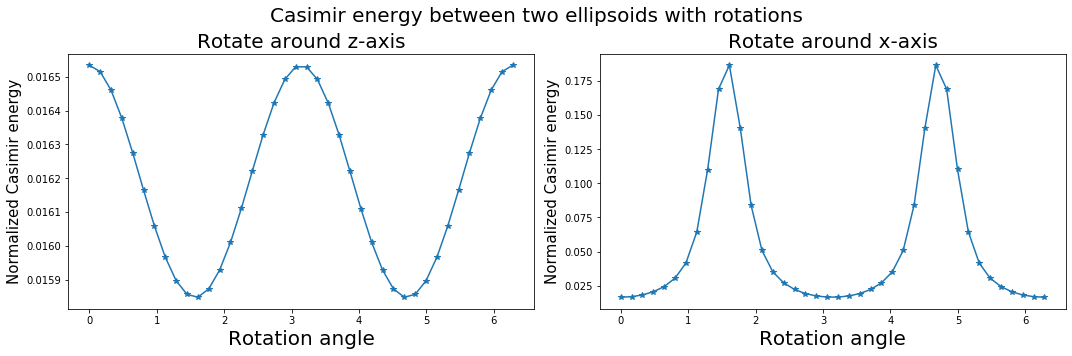

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(np.linspace(0, 2*np.pi, 40), Cas_inward, '*-' )
ax1.set_xlabel('Rotation angle', fontsize = 20)
ax1.set_ylabel('Normalized Casimir energy', fontsize = 15)
ax1.set_title('Rotate around z-axis', fontsize = 20)

ax2.plot(np.linspace(0, 2*np.pi, 40), Cas_outward, '*-' )
ax2.set_xlabel('Rotation angle', fontsize = 20)
ax2.set_ylabel('Normalized Casimir energy', fontsize = 15)
ax2.set_title('Rotate around x-axis', fontsize = 20)
fig.suptitle('Casimir energy between two ellipsoids with rotations', fontsize = 20)
fig.tight_layout()
fig.subplots_adjust(top=0.85)
fig.savefig('CasE_ellipsoids_with_rotation.pdf')

In [1]:
Cas_ellipsoids_extrapo = [0.0390005769506665, 0.016533879825011723, 0.00889062191549872, 0.005423468026002636, 
                          0.0035891833432366935, 0.002514551224815099, 0.0018377362913438804, 0.001387812965880845, 
                          0.0010758948409249763, 0.0008522471627276598, 0.0006873911566593121]

In [23]:
Cas_ellipsoids_extrapo_round = [0.03900, 0.01653, 0.008891, 0.005423, 0.003589, 0.002515, 0.001838, 0.001388, 0.001076, 0.0008522, 0.0006874]

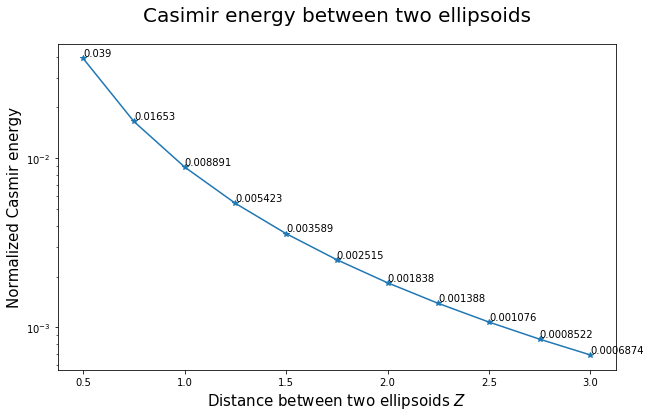

In [28]:
plt.figure(figsize = [10,6])

plt.semilogy(np.linspace(0.5, 3, 11), Cas_ellipsoids_extrapo_round,  '*-')
for i,j in zip(np.linspace(0.5, 3, 11),Cas_ellipsoids_extrapo_round):
    plt.annotate(str(j),xy=(i,j), ha = 'left', va = 'bottom')
    
plt.xlabel('Distance between two ellipsoids $Z$', fontsize = 15)
plt.ylabel('Normalized Casmir energy', fontsize = 15)
plt.title('Casimir energy between two ellipsoids', fontsize = 20, y = 1.05)
plt.savefig('CasE_ellipsoids.pdf')

In [ ]:
for i in range(len(Cas_x_075_005)):
    print(Cas_x_075_005[i] + (Cas_x_075_005[i] - Cas_x_075_01[i])/(2**2 - 1))